In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Creating inspection variable
inspector = inspect(engine)

In [10]:
# Inspect the measurement table and loop through output to get column names
measurement_columns = inspector.get_columns("measurement")
for column in measurement_columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
# Set variables for columns in the measurement table
ms = measurement.station
md = measurement.date
mp = measurement.prcp
mt = measurement.tobs

In [12]:
# Find the most recent date in the data set.
most_recent_date = session.query(md).order_by(md.desc()).first()
most_recent_date

('2017-08-23',)

<Axes: xlabel='Date', ylabel='Inches'>

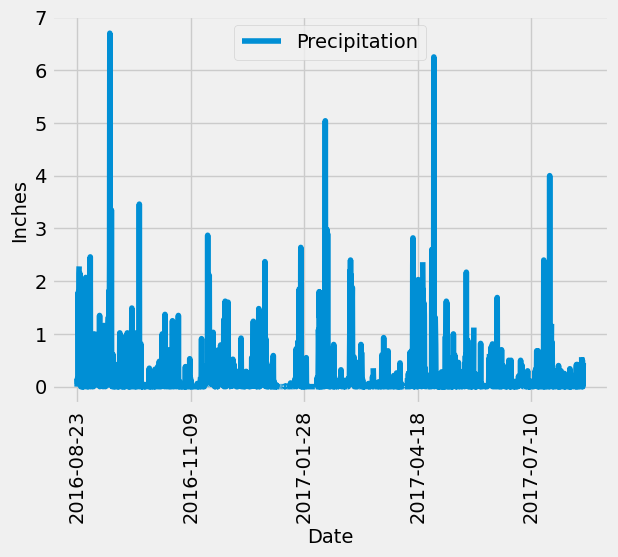

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
query_date

# Perform a query to retrieve the data and precipitation scores
# Ordered by the date in ascending order
last_year_rain = session.query(md, mp).order_by(md).\
    filter(md >= query_date).all()

# List comprehension to pull the output into a list of dictionary
output = [{"Date": rain[0], "Precipitation": rain[1]} for rain in last_year_rain]

# Save the query results as a Pandas DataFrame. Explicitly set the column names
rain_df = pd.DataFrame(output)


# Use Pandas Plotting with Matplotlib to plot the data
rain_df.plot(x="Date", y="Precipitation", rot=90, ylabel="Inches")

In [14]:
# Use Pandas to calculate the summary statistics for the precipitation data
rain_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
# Inspect the station table and loop through output to get column names
station_columns = inspector.get_columns("station")
for column in station_columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [16]:
# Design a query to calculate the total number of stations in the dataset
session.query(station).count()

9

In [17]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(ms, func.count(ms)).\
    group_by(ms).\
    order_by(func.count(ms).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(mt), func.max(mt), func.avg(mt)).\
    filter(ms == "USC00519281").all()

[(54.0, 85.0, 71.66378066378067)]

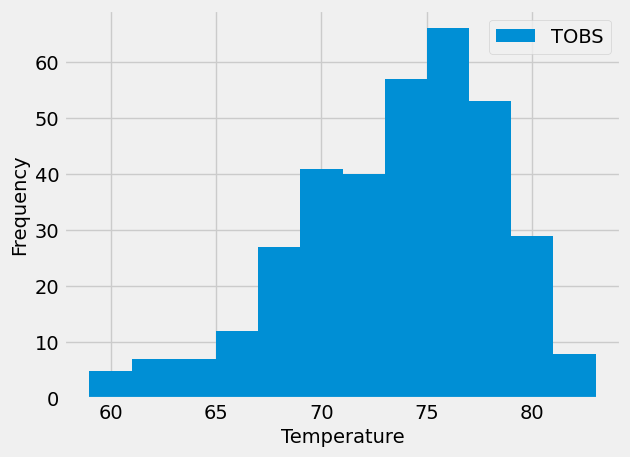

In [19]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station
 
station_last_year_temp = session.query(md, mt).order_by(mt).\
    filter(md >= query_date).\
    filter(ms == "USC00519281").all()


# List comprehension to pull the output into a list of dictionary
station_output = [{"Date": temp[0], "TOBS": temp[1]} for temp in station_last_year_temp]

# Save the query results as a Pandas DataFrame. Explicitly set the column names
temperature_df = pd.DataFrame(station_output)

# Plotting the dataframe as a histogram with bin = 12
plt.hist(temperature_df["TOBS"], bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(["TOBS"])
plt.show()

# Close Session

In [20]:
# Close Session
session.close()